<a href="https://colab.research.google.com/github/CamilleKoczorowski/population-gcn/blob/master/Reproductibilite_Article_PARISOT_FINALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Geometric Data Analysis - Spectral Graph Convolutions for Population-based Disease Prediction
**Sarah Parisot⋆, Sofia Ira Ktena, Enzo Ferrante, Matthew Lee,
Ricardo Guerrerro Moreno, Ben Glocker, and Daniel Rueckert**
*Biomedical Image Analysis Group, Imperial College London, UK*

____

## Chargement des données depuis le dossier data du Github

In [1]:
!pwd

/Users/camillekoczo/Desktop/MVA/Semestre_1/GEOMETRIC DATA ANALYSIS/population-gcn/notebook


In [7]:
%cd ..
%pwd

/Users/camillekoczo/Desktop/MVA/Semestre_1/GEOMETRIC DATA ANALYSIS/population-gcn


'/Users/camillekoczo/Desktop/MVA/Semestre_1/GEOMETRIC DATA ANALYSIS/population-gcn'

In [8]:
from pathlib import Path
import os

# Trouver le dossier du notebook
root = Path(os.getcwd()).resolve()

print("Root set to:", root)


Root set to: /Users/camillekoczo/Desktop/MVA/Semestre_1/GEOMETRIC DATA ANALYSIS/population-gcn


Nb dossiers sujets : 13
['.DS_Store', 'ABIDEParser.py', 'fetch_data.py', 'train_GCN.py', 'readme.md', 'main_ABIDE.py', 'subject_IDs.txt', 'results', 'ADNI_IDs.txt', 'notebook']


In [13]:
#root = "/content/drive/MyDrive/MVA_ABIDE_article/ABIDE_pcp/cpac/filt_noglobal"
folder = root / "data/ABIDE_pcp/cpac/filt_noglobal"
print("Nb dossiers sujets :", len(os.listdir(folder)))
print(os.listdir(folder)[:10])


Nb dossiers sujets : 873
['50128', '51203', '50325', '50117', '50573', '50741', '51009', '50574', '51036', '51204']


In [7]:
file = "/content/population-gcn/ABIDEParser.py"

text = open(file).read()
text = text.replace("../../path/to/data/ABIDE_pcp",
                    "/content/drive/MyDrive/MVA_ABIDE_article/ABIDE_pcp/")

open(file, "w").write(text)

print("Chemin mis à jour ✔️")


Chemin mis à jour ✔️


____

In [8]:
import os
os.chdir('/content')   # adapte si besoin
!pwd


/content


In [9]:
!git clone https://github.com/parisots/gcn.git


Cloning into 'gcn'...
remote: Enumerating objects: 140, done.
remote: Total 140 (delta 0), reused 0 (delta 0), pack-reused 140 (from 1)
Receiving objects: 100% (140/140), 5.07 MiB | 12.43 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [10]:
!pip install nilearn scikit-learn scipy tensorflow


In [10]:
#def patch_tf_import(path):
#    with open(path, "r") as f:
#        code = f.read()
#
#    if "tensorflow.compat.v1" in code:
#        print(path, "déjà patché.")
#        return
#
#    new = code.replace(
#        "import tensorflow as tf",
#        "import tensorflow.compat.v1 as tf\n" +
#        "tf.disable_v2_behavior()\n"
#    )
#    with open(path, "w") as f:
#        f.write(new)
#    print("Patch appliqué à", path)
#
## 1) Fichier de Parisot pour l'entraînement ABIDE
#patch_tf_import("/content/population-gcn/train_GCN.py")
#
## 2) Implémentation GCN forkée
#patch_tf_import("/content/gcn/gcn/utils.py")
#patch_tf_import("/content/gcn/gcn/models.py")
#patch_tf_import("/content/gcn/gcn/utils.py")
#patch_tf_import("/content/gcn/gcn/models.py")
#patch_tf_import("/content/gcn/gcn/layers.py")



/content/population-gcn/train_GCN.py déjà patché.
Patch appliqué à /content/gcn/gcn/utils.py
Patch appliqué à /content/gcn/gcn/models.py
Patch appliqué à /content/gcn/gcn/utils.py
Patch appliqué à /content/gcn/gcn/models.py
Patch appliqué à /content/gcn/gcn/layers.py


In [11]:
%cd /content/gcn
!python setup.py install

# On revient dans population-gcn
%cd /content/population-gcn


/content/gcn
running install
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.12/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

    

In [12]:
!pwd

/content/population-gcn


## Déplacer à la main le dossier /gcn de /gcn dans population-gcn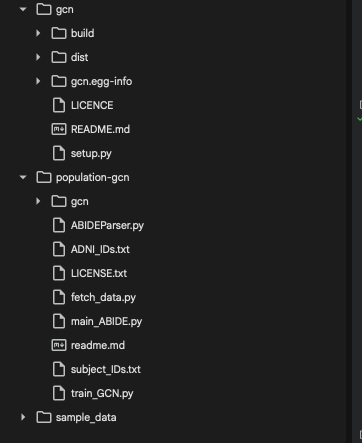

In [13]:
import os

def patch_tf_import(path):
    print(f"\n--- Patch TF v1 dans {path} ---")
    if not os.path.exists(path):
        print("  ⚠️ Fichier introuvable, je saute.")
        return

    with open(path, "r") as f:
        code = f.read()

    if "tensorflow.compat.v1 as tf" in code:
        print("  ✅ Déjà patché (tensorflow.compat.v1 trouvé).")
        return

    if "import tensorflow as tf" not in code:
        print("  ⚠️ Pas de 'import tensorflow as tf' trouvé, je ne change rien.")
        return

    new = code.replace(
        "import tensorflow as tf",
        "import tensorflow.compat.v1 as tf\n"
        "tf.disable_v2_behavior()\n"
    )

    with open(path, "w") as f:
        f.write(new)

    print("  ✅ Patch appliqué (TF2 → TF1-compat).")


def patch_scipy_eigsh(path):
    print(f"\n--- Patch SciPy eigsh dans {path} ---")
    if not os.path.exists(path):
        print("  ⚠️ Fichier introuvable, je saute.")
        return

    with open(path, "r") as f:
        code = f.read()

    if "from scipy.sparse.linalg import eigsh" in code:
        print("  ✅ Déjà patché (import eigsh OK).")
        return

    if "from scipy.sparse.linalg.eigen.arpack import eigsh" not in code:
        print("  ⚠️ Pas de vieux import arpack trouvé, je ne change rien.")
        return

    new = code.replace(
        "from scipy.sparse.linalg.eigen.arpack import eigsh",
        "from scipy.sparse.linalg import eigsh"
    )

    with open(path, "w") as f:
        f.write(new)

    print("  ✅ Patch eigsh appliqué.")


base = "/content/population-gcn"

# Tous les fichiers TF utilisés par Parisot
tf_files = [
    f"{base}/train_GCN.py",
    f"{base}/gcn/utils.py",
    f"{base}/gcn/models.py",
    f"{base}/gcn/layers.py",
    f"{base}/gcn/metrics.py",
    f"{base}/gcn/inits.py",
    f"{base}/gcn/train.py",
]

for p in tf_files:
    patch_tf_import(p)

# Patch SciPy dans utils
patch_scipy_eigsh(f"{base}/gcn/utils.py")

print("\n✅ Tous les patches ont été appliqués (ou déjà présents).")



--- Patch TF v1 dans /content/population-gcn/train_GCN.py ---
  ✅ Patch appliqué (TF2 → TF1-compat).

--- Patch TF v1 dans /content/population-gcn/gcn/utils.py ---
  ⚠️ Pas de 'import tensorflow as tf' trouvé, je ne change rien.

--- Patch TF v1 dans /content/population-gcn/gcn/models.py ---
  ⚠️ Pas de 'import tensorflow as tf' trouvé, je ne change rien.

--- Patch TF v1 dans /content/population-gcn/gcn/layers.py ---
  ✅ Patch appliqué (TF2 → TF1-compat).

--- Patch TF v1 dans /content/population-gcn/gcn/metrics.py ---
  ✅ Patch appliqué (TF2 → TF1-compat).

--- Patch TF v1 dans /content/population-gcn/gcn/inits.py ---
  ✅ Patch appliqué (TF2 → TF1-compat).

--- Patch TF v1 dans /content/population-gcn/gcn/train.py ---
  ✅ Patch appliqué (TF2 → TF1-compat).

--- Patch SciPy eigsh dans /content/population-gcn/gcn/utils.py ---
  ✅ Patch eigsh appliqué.

✅ Tous les patches ont été appliqués (ou déjà présents).


In [40]:
#!git clone https://github.com/tkipf/pygcn.git
#%cd pygcn


Cloning into 'pygcn'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78 (from 1)
Receiving objects: 100% (78/78), 226.61 KiB | 2.60 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/pygcn


In [14]:
!pwd

/content/population-gcn


In [15]:
import fileinput

file_path = "gcn/utils.py"

for line in fileinput.input(file_path, inplace=True):
    print(line.replace(
        "from scipy.sparse.linalg.eigen.arpack import eigsh",
        "from scipy.sparse.linalg import eigsh"
    ), end="")


___

## Run

In [18]:
#!mkdir -p /content/drive/MyDrive/MVA_ABIDE_article/ABIDE_pcp/cpac/filt_noglobal


In [24]:
import os, shutil

# 1) Emplacement où le code cherche les données
data_dir = '/content/drive/MyDrive/MVA_ABIDE_article/ABIDE_pcp/cpac/filt_noglobal/' #"/content/drive/MyDrive/MVA_ABIDE_article/"

# 2) Fichier source dans le repo cloné
src = "subject_IDs.txt"

# 3) Destination attendue par ABIDEParser
dst = os.path.join(data_dir, "subject_IDs.txt")

# 4) Copie
shutil.copy(src, dst)

print("Copié vers :", dst)
print("Existe ?", os.path.isfile(dst))


Copié vers : /content/drive/MyDrive/MVA_ABIDE_article/ABIDE_pcp/cpac/filt_noglobal/subject_IDs.txt
Existe ? True


In [19]:
!pwd

/content/population-gcn


## Modifier ABIDEParser.py
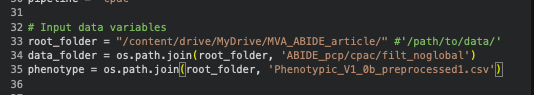

In [26]:
import os

rootttt = "/content/drive/MyDrive/MVA_ABIDE_article/ABIDE_pcp/cpac/filt_noglobal"
print("N subjects:", len(os.listdir(rootttt)))


N subjects: 873


In [27]:
import fileinput

file_path = "/content/population-gcn/main_ABIDE.py"

for line in fileinput.input(file_path, inplace=True):
    line = line.replace("dtype=np.int)", "dtype=int)")
    print(line, end="")


In [29]:
file_path = "/content/population-gcn/ABIDEParser.py"

for line in fileinput.input(file_path, inplace=True):
    if "RFE(estimator" in line and "n_features_to_select" not in line:
        line = line.replace(
            "RFE(estimator, fnum, step=100, verbose=1)",
            "RFE(estimator, n_features_to_select=fnum, step=100, verbose=1)"
        )
    print(line, end="")


___

## Modifications à faire dans train_GCN.py

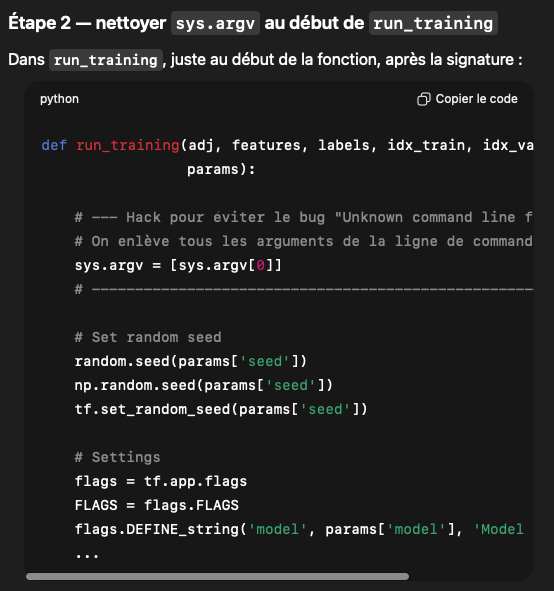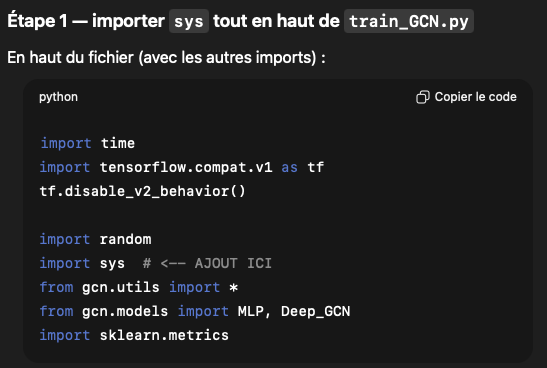


# --- Hack pour éviter le bug "Unknown command line flag 'folds'" ---
    # On enlève tous les arguments de la ligne de commande pour TF/absl
    sys.argv = [sys.argv[0]]
    # --------------------------------------------------------------------


In [34]:
import fileinput

metrics_path = "/content/population-gcn/gcn/metrics.py"

for line in fileinput.input(metrics_path, inplace=True):
    if "tf.contrib.metrics.streaming_auc" in line:
        # On remplace l'ancienne ligne par une version neutre
        print("    # patched: tf.contrib.metrics.streaming_auc removed in TF2", end="\n")
        print("    auc = tf.constant(0.0, dtype=tf.float32)", end="\n")
    else:
        print(line, end="")


____

## Modification dans main_ABIDE.py

Puis remplace le bloc if args.save == 1: par :

`import os`


Puis remplace le bloc if args.save == 1: par :



```
if args.save == 1:
    result_name = 'ABIDE_classification'  # sans .mat

    # Dossier sur ton Drive
    save_dir = "/content/drive/MyDrive/MVA_ABIDE_article/results"
    os.makedirs(save_dir, exist_ok=True)

    out_path = os.path.join(save_dir, result_name + ".mat")
    print("Saving results to:", out_path)

    sio.savemat(
        out_path,
        {
            'lin': scores_lin,
            'lin_auc': scores_auc_lin,
            'acc': scores_acc,
            'auc': scores_auc,
            'folds': fold_size
        }
    )

```



# RUN FINAL (mettre --save 1)

In [37]:
!python main_ABIDE.py --folds 0 --epochs 150 --save 1


2025-12-03 00:10:01.359165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764720601.383834   16676 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764720601.391367   16676 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764720601.409493   16676 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764720601.409540   16676 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764720601.409545   16676 computation_placer.cc:177] computation placer alr

In [36]:
!python main_ABIDE.py --folds 0 --epochs 1 --save 1


2025-12-03 00:08:31.753310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764720511.777826   16296 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764720511.785143   16296 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764720511.803386   16296 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764720511.803427   16296 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764720511.803432   16296 computation_placer.cc:177] computation placer alr

In [30]:
!python main_ABIDE.py --folds 0 --epochs 1


2025-12-02 23:41:38.398879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764718898.463589    9757 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764718898.483144    9757 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764718898.534218    9757 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764718898.534309    9757 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764718898.534314    9757 computation_placer.cc:177] computation placer alr

In [28]:
!python main_ABIDE.py --folds 0


2025-12-02 23:24:24.583466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764717864.607466    5585 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764717864.615057    5585 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764717864.633499    5585 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764717864.633545    5585 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764717864.633550    5585 computation_placer.cc:177] computation placer alr